In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import xlrd
import csv

def csv_from_excel():
    wb = xlrd.open_workbook('~/Documents/GitHub/SimpleStorageSystem/nofault/nofault_data/data_nofault_f.xlsx')
    sh = wb.sheet_by_name('Sheet1')
    your_csv_file = open('csvtest.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# runs the csv_from_excel function:
csv_from_excel()

def csv_from_excel1():
    wb = xlrd.open_workbook('~/Documents/GitHub/SimpleStorageSystem/fault/ds_fault/fault_f.xlsx')
    sh = wb.sheet_by_name('Sheet1')
    your_csv_file = open('csvtest1.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

# runs the csv_from_excel function:
csv_from_excel1()

In [3]:
df= pd.read_csv("csvtest.csv")
df1 = pd.read_csv("csvtest1.csv")

In [4]:
df.head()

,M,N,F,C,Message Exchanged,Bytes Transferred,Response Time
0,100.0,100.0,1000.0,1.0,1558.0,37316176.0,96447492.0
1,100.0,100.0,500.0,1.0,1567.0,38342720.0,112026199.0
2,100.0,100.0,200.0,1.0,1468.0,35654576.0,110866334.0
3,100.0,100.0,100.0,1.0,1564.0,38302544.0,88241881.0
4,100.0,100.0,20.0,1.0,1513.0,36836608.0,91482447.0


In [5]:
xaxis = 'F'
yaxis = 'Bytes Transferred'
x = df[xaxis]
y = df[yaxis]
x1 = df1[xaxis]
y1 = df1[yaxis]
maxis = 'F'
naxis = 'Message Exchanged'
m = df[maxis]
n = df[naxis]
m1 = df1[maxis]
n1 = df1[naxis]

paxis = 'F'
kaxis = 'Response Time'
p = df[paxis]
k = df[kaxis]
p1 = df1[paxis]
k1 = df1[kaxis]

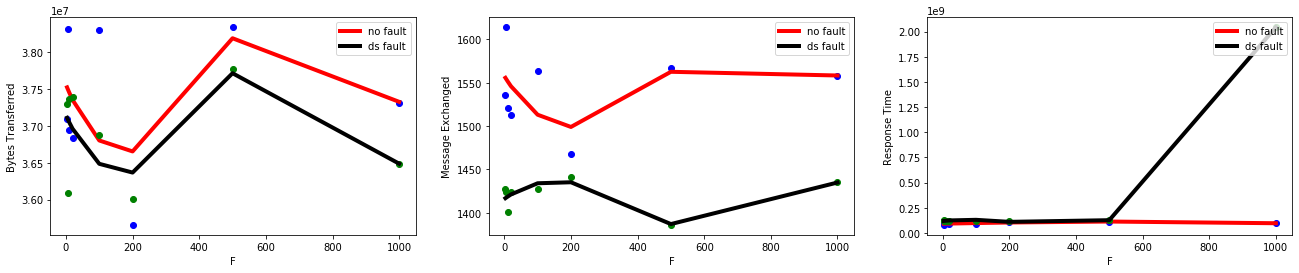

In [6]:
plt.subplot(1,3,1)
plt.plot(x, y, "bo")
fp2 = np.polyfit(x,y,3)
f2 = np.poly1d(fp2)

fx = df[xaxis]
plt.plot(fx,f2(fx),linewidth=4,color='r', label = 'no fault')## f2.order: 函数的阶数


plt.plot(x1, y1, "go")
fp2 = np.polyfit(x1,y1,3)
f2 = np.poly1d(fp2)

fx = df1[xaxis]
plt.plot(fx,f2(fx),linewidth=4,color='black', label = 'ds fault')## f2.order: 函数的阶数
plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.legend(loc='upper right')

plt.subplot(1,3,2)
plt.plot(m, n, "bo")
fp2 = np.polyfit(m,n,3)
f2 = np.poly1d(fp2)

fx = df[maxis]
plt.plot(fx,f2(fx),linewidth=4,color='r',label = 'no fault')## f2.order: 函数的阶数

plt.xlabel(maxis)
plt.ylabel(naxis)


plt.plot(m1, n1, "go")
fp2 = np.polyfit(m1,n1,3)
f2 = np.poly1d(fp2)

fx = df1[maxis]
plt.plot(fx,f2(fx),linewidth=4,color='black', label = 'ds fault')## f2.order: 函数的阶数

plt.xlabel(maxis)
plt.ylabel(naxis)
plt.legend(loc='upper right')


plt.subplot(1,3,3)
plt.plot(p, k, "bo")
fp2 = np.polyfit(p,k,3)
f2 = np.poly1d(fp2)

fx = df[paxis]
plt.plot(fx,f2(fx),linewidth=4,color='r',label = 'no fault')## f2.order: 函数的阶数

plt.xlabel(paxis)
plt.ylabel(kaxis)


plt.plot(p1, k1, "go")
fp2 = np.polyfit(p1,k1,3)
f2 = np.poly1d(fp2)

fx = df1[paxis]
plt.plot(fx,f2(fx),linewidth=4,color='black', label = 'ds fault')## f2.order: 函数的阶数

plt.xlabel(paxis)
plt.ylabel(kaxis)
plt.legend(loc='upper right')


plt.subplots_adjust(left=None, bottom=None, right=3, top=None,
                wspace=None, hspace=None)
plt.show()